In [15]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from sklearn.datasets import make_blobs
import time
import scipy.stats as stats
from random import choice, shuffle
from string import ascii_lowercase, digits
from datetime import datetime
import random
import timeit

In [16]:
# Set Parameters
n_samples = 1000000
num_bins = 20
length_strings = 3
num_values = 5
range_of_numbers = 100

In [17]:
def create_several_values(n_samples=n_samples, num_values=num_values, range_of_numbers=range_of_numbers):
    randoms = random.sample(range(range_of_numbers), num_values)
    sample_repetetive_numbers = [choice(randoms) for _ in range(n_samples)]
    return sample_repetetive_numbers

In [18]:
def create_dates(n_samples=n_samples):
    sample_dates = pd.date_range(end = datetime.today(), periods = n_samples).to_pydatetime().tolist()
    shuffle(sample_dates)
    return sample_dates

In [19]:
def create_strings(n_samples=n_samples, length_strings=length_strings):
    chars = ascii_lowercase + digits
    sample_strings = [''.join(choice(chars) for _ in range(length_strings)) for _ in range(n_samples)]
    #print(lst)
    return sample_strings

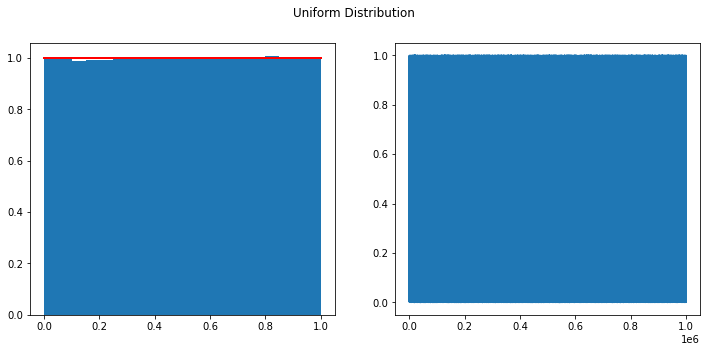

In [20]:
# Create uniform distribution
def uniform_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    sample_uniform = (np.random.uniform(low,high,n_samples))
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform)
    return sample_uniform

sample_uniform=uniform_distribution()

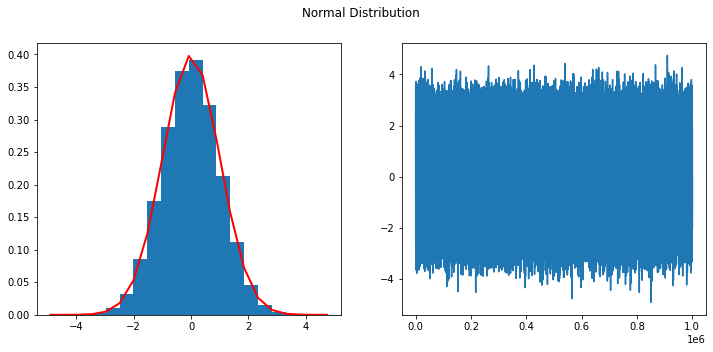

In [21]:
def normal_distribution(n_samples=n_samples, num_bins=num_bins, display = True, mu=0., sigma=1.):
    # Normal distribution
    sample_normal = np.random.normal(mu, sigma, n_samples)
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Normal Distribution')
        count, bins, ignored = ax1.hist(sample_normal, num_bins, density=True)
        ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                 linewidth=2, color='r')
        ax2.plot(sample_normal)
    return sample_normal

sample_normal = normal_distribution()

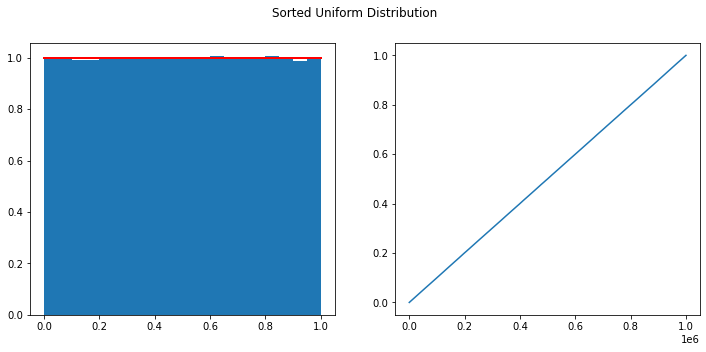

In [22]:
def uniform_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    #Sorted Uniform distribution
    sample_uniform_sorted = np.sort(np.random.uniform(low,high,n_samples))
    if display == True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_sorted)
    return sample_uniform_sorted
sample_uniform_sorted = uniform_sorted_distribution()

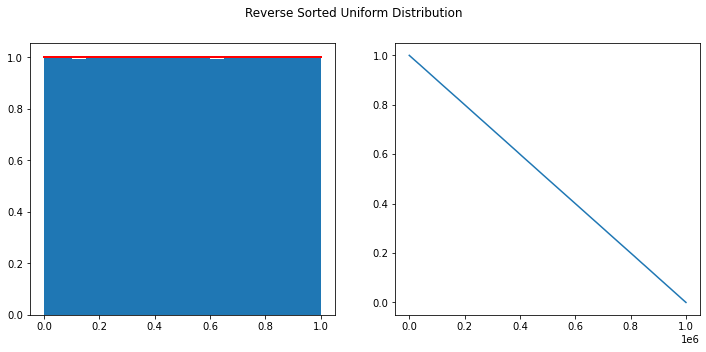

In [23]:
def uniform_reverse_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    # Reverse Sorted Uniform distribution
    sample_uniform_reverse_sorted = np.sort(np.random.uniform(low,high,n_samples))[::-1]
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Reverse Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_reverse_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_reverse_sorted)
    return sample_uniform_reverse_sorted
sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution()

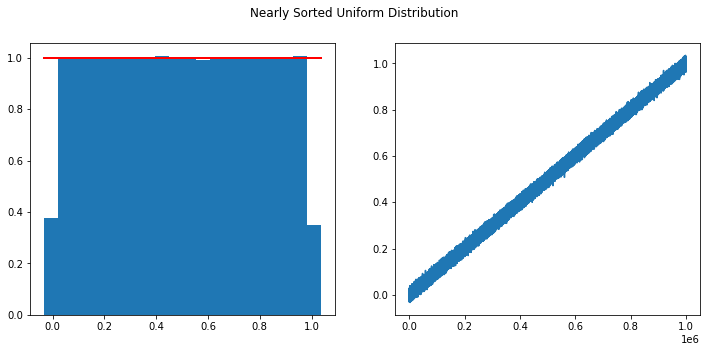

In [24]:
def uniform_nearly_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1., mean_noise= 0., std_noice = 0.01):
    # Nearly Uniform distribution
    sample_uniform_nearly_sorted = np.sort(np.random.uniform(low,high,n_samples))
    noise = np.random.normal(mean_noise,std_noice,n_samples)
    sample_uniform_nearly_sorted = sample_uniform_nearly_sorted + noise
    if display==True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Nearly Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_nearly_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_nearly_sorted)
    return sample_uniform_nearly_sorted
sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution()

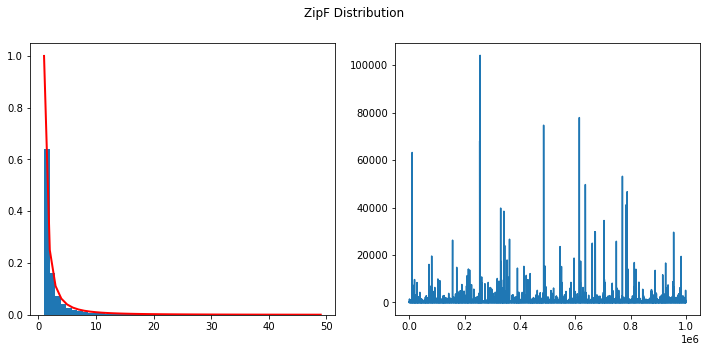

In [25]:
def zipf_distribution(n_samples=n_samples, num_bins=num_bins, display = True, a=2.):
    # ZipF Distribution
    sample_zipf = np.random.zipf(a, n_samples)
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('ZipF Distribution')
        count, bins, ignored = ax1.hist(sample_zipf[sample_zipf<50], 50, density=True)
        x = np.arange(1., 50.)
        y = x**(-a) / special.zetac(a)
        ax1.plot(x, y/max(y), linewidth=2, color='r')
        ax2.plot(sample_zipf)
    return sample_zipf
sample_zipf = zipf_distribution()

In [28]:
def create_df_distributions():
    sample_uniform=uniform_distribution(display=False)
    sample_normal = normal_distribution(display=False)
    sample_uniform_sorted = uniform_sorted_distribution(display=False)
    sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution(display=False)
    sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution(display=False)
    sample_zipf = zipf_distribution(display=False)
    sample_strings = create_strings(n_samples=n_samples, length_strings=length_strings)
    #sample_dates = create_dates(n_samples=n_samples)
    sample_repetetive_numbers = create_several_values(n_samples=n_samples, num_values=num_values, range_of_numbers=range_of_numbers)
    df_distribions = pd.DataFrame()#.astype(np.float64)
    df_distribions["Uniform"] = sample_uniform
    df_distribions["Normal"] = sample_normal
    df_distribions["Uniform_Sorted"] = sample_uniform_sorted
    df_distribions["Uniform_Reverse_Sorted"] = sample_uniform_reverse_sorted
    df_distribions["Uniform_Nearly_Sorted"] = sample_uniform_nearly_sorted
    df_distribions["Zipf"] = sample_zipf
    df_distribions["Strings"] = sample_strings
    #df_distribions["Dates"] = sample_dates
    df_distribions["Repetetive_Numbers"] = sample_repetetive_numbers
    
    return df_distribions

In [29]:
df_distribions = create_df_distributions()

In [30]:
df_distribions.head(5)

,Uniform,Normal,Uniform_Sorted,Uniform_Reverse_Sorted,Uniform_Nearly_Sorted,Zipf,Strings,Repetetive_Numbers
0,0.415933,0.074887,2.192863e-07,0.999999,0.012309,1,cnl,58
1,0.121202,-0.419733,8.402497e-07,0.999998,-0.015983,1,flf,62
2,0.919991,0.090523,1.835177e-06,0.999997,0.000371,4,6rf,58
3,0.517643,-0.725866,2.736161e-06,0.999996,-0.005231,1,oyi,58
4,0.095533,-1.454656,2.954718e-06,0.999996,0.003629,1,yfh,95


In [37]:
def evaluate_sorts(distribution="Uniform", second_col = None, repetitions=50):
    if second_col == None:
        measures = pd.DataFrame().astype(np.float64)
        for sorting_algorithm in ["quicksort", "mergesort", "heapsort"]:
            algorithm_times = []
            for i in range(repetitions):
                df_distribions = create_df_distributions()
                start_time = datetime.now()
                #start_time = float("{:.20f}".format(time.time()))
                df_distribions.sort_values([distribution],kind=sorting_algorithm)
                #exeuction_time =(float("{:.20f}".format(time.time())) - float("{:.20f}".format(start_time)))*1000
                exeuction_time = (datetime.now() - start_time).microseconds/1000
                algorithm_times.append(exeuction_time)
            measures[sorting_algorithm] = algorithm_times
            print("The time of",sorting_algorithm, "is", np.round(np.mean(algorithm_times),4), "miliseconds")
            print("It has a STD of", np.round(np.std(algorithm_times),2))
    else:
        measures = pd.DataFrame().astype(np.float64)
        for sorting_algorithm in ["quicksort", "mergesort", "heapsort"]:
            algorithm_times = []
            for i in range(repetitions):
                df_distribions = create_df_distributions()
                start_time = datetime.now()
                #start_time = float("{:.20f}".format(time.time()))
                df_distribions.sort_values([distribution, second_col],kind=sorting_algorithm)
                #exeuction_time =(float("{:.20f}".format(time.time())) - float("{:.20f}".format(start_time)))*1000
                exeuction_time = (datetime.now() - start_time).microseconds/1000
                algorithm_times.append(exeuction_time)
            measures[sorting_algorithm] = algorithm_times
            print("The time of",sorting_algorithm, "is", np.round(np.mean(algorithm_times),4), "miliseconds")
            print("It has a STD of", np.round(np.std(algorithm_times),2))
    return measures

In [38]:
print("Repetetive_Numbers + Uniform")
df_repetetive_numbers_uniform = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Uniform")

Repetetive_Numbers + Uniform
The time of quicksort is 72.1458 miliseconds
It has a STD of 20.75
The time of mergesort is 76.4333 miliseconds
It has a STD of 28.06
The time of heapsort is 81.7039 miliseconds
It has a STD of 38.5


In [39]:
print("Repetetive_Numbers + Strings")
df_repetetive_numbers_strings = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Strings")

Repetetive_Numbers + Strings
The time of quicksort is 598.0527 miliseconds
It has a STD of 12.06
The time of mergesort is 596.9216 miliseconds
It has a STD of 7.87
The time of heapsort is 598.2208 miliseconds
It has a STD of 12.24


In [40]:
print("Repetetive_Numbers + Uniform_Reverse_Sorted")
df_repetetive_numbers_reverse_sorted = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Uniform_Reverse_Sorted")

Repetetive_Numbers + Uniform_Reverse_Sorted
The time of quicksort is 602.2588 miliseconds
It has a STD of 21.05
The time of mergesort is 599.5712 miliseconds
It has a STD of 13.69
The time of heapsort is 603.2736 miliseconds
It has a STD of 26.98


In [41]:
print("Repetetive_Numbers + Uniform_Nearly_Sorted")
df_repetetive_numbers_nearly_sorted = evaluate_sorts(distribution="Repetetive_Numbers", second_col="Uniform_Nearly_Sorted")

Repetetive_Numbers + Uniform_Nearly_Sorted
The time of quicksort is 784.9775 miliseconds
It has a STD of 22.85
The time of mergesort is 783.0398 miliseconds
It has a STD of 19.48
The time of heapsort is 782.8506 miliseconds
It has a STD of 16.95


In [42]:
print("Repetetive_Numbers")
df_repetetive_numbers = evaluate_sorts(distribution="Repetetive_Numbers")

Repetetive_Numbers
The time of quicksort is 182.0469 miliseconds
It has a STD of 4.05
The time of mergesort is 164.2225 miliseconds
It has a STD of 6.42
The time of heapsort is 232.2334 miliseconds
It has a STD of 5.36


In [43]:
#print("Dates")
#df_dates = evaluate_sorts(distribution="Dates")

In [44]:
print("Strings")
df_strings = evaluate_sorts(distribution="Strings")

Strings
The time of quicksort is 644.0963 miliseconds
It has a STD of 56.98
The time of mergesort is 526.7994 miliseconds
It has a STD of 33.28
The time of heapsort is 303.0104 miliseconds
It has a STD of 112.02


In [45]:
print("Uniform")
df_uniform = evaluate_sorts(distribution="Uniform")

Uniform
The time of quicksort is 439.4321 miliseconds
It has a STD of 11.82
The time of mergesort is 452.6799 miliseconds
It has a STD of 8.31
The time of heapsort is 650.3269 miliseconds
It has a STD of 18.23


In [46]:
print("Normal")
df_normal = evaluate_sorts(distribution="Normal")

Normal
The time of quicksort is 433.6325 miliseconds
It has a STD of 6.56
The time of mergesort is 448.7764 miliseconds
It has a STD of 6.6
The time of heapsort is 657.2017 miliseconds
It has a STD of 31.37


In [47]:
print("Uniform_Sorted")
df_uniform_sorted = evaluate_sorts(distribution="Uniform_Sorted")

Uniform_Sorted
The time of quicksort is 106.386 miliseconds
It has a STD of 4.33
The time of mergesort is 94.7018 miliseconds
It has a STD of 5.12
The time of heapsort is 166.8338 miliseconds
It has a STD of 6.02


In [48]:
print("Uniform_Reverse_Sorted")
df_uniform_reverse_sorted = evaluate_sorts(distribution="Uniform_Reverse_Sorted")

Uniform_Reverse_Sorted
The time of quicksort is 117.3044 miliseconds
It has a STD of 5.91
The time of mergesort is 94.8985 miliseconds
It has a STD of 3.84
The time of heapsort is 179.6887 miliseconds
It has a STD of 6.01


In [49]:
print("Uniform_Nearly_Sorted")
df_uniform_nearly_sorted = evaluate_sorts(distribution="Uniform_Nearly_Sorted")

Uniform_Nearly_Sorted
The time of quicksort is 221.0933 miliseconds
It has a STD of 10.43
The time of mergesort is 229.6474 miliseconds
It has a STD of 9.69
The time of heapsort is 309.6142 miliseconds
It has a STD of 5.31


In [50]:
print("Zipf")
df_zipf = evaluate_sorts(distribution="Zipf")

Zipf
The time of quicksort is 179.2469 miliseconds
It has a STD of 5.5
The time of mergesort is 172.3572 miliseconds
It has a STD of 6.07
The time of heapsort is 226.0079 miliseconds
It has a STD of 9.23


In [51]:
def calculate_stats(df_dist, sort_algo):
    df_sort_algo = df_dist[sort_algo]
    std_sort_algo = np.std(df_sort_algo) 
    mean_sort_algo = np.mean(df_sort_algo) 
    return df_sort_algo, std_sort_algo,mean_sort_algo

def plot_runtimes(sort_dist, std_sort_algo, mean_sort_algo):
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    fig.suptitle('Distribution')
    count, bins, ignored = ax1.hist(sort_dist, 10, density=True)
    #ax1.plot(bins, 1/(std_sort_algo * np.sqrt(2 * np.pi)) *
    #               np.exp( - (bins - mean_sort_algo)**2 / (2 * std_sort_algo**2) ),
    #         linewidth=2, color='r')
    ax2.plot(sort_dist)

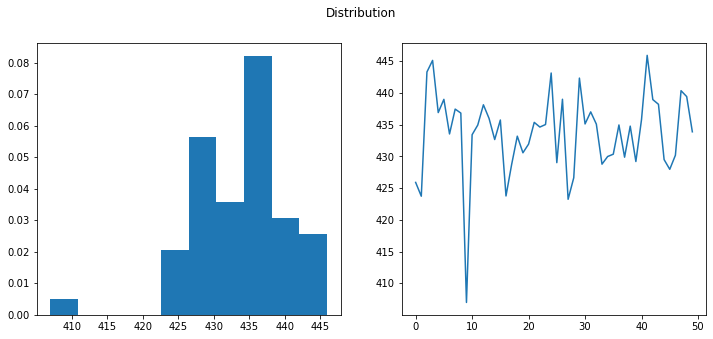

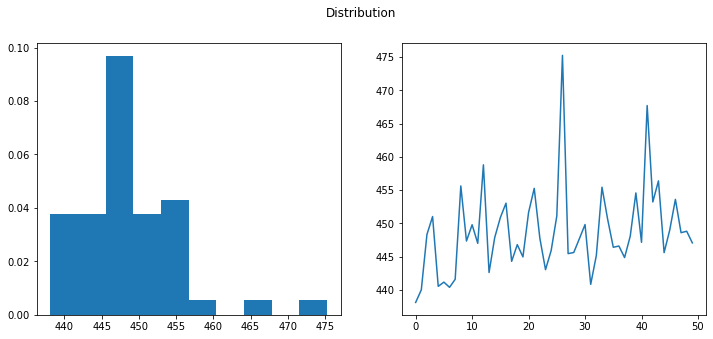

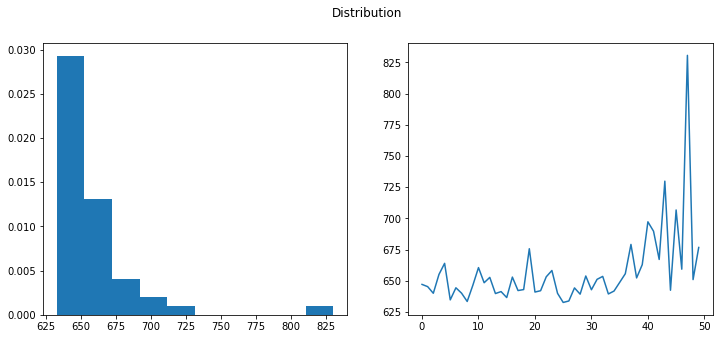

In [52]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_normal, algo)
    plot_runtimes(df,std,mean)

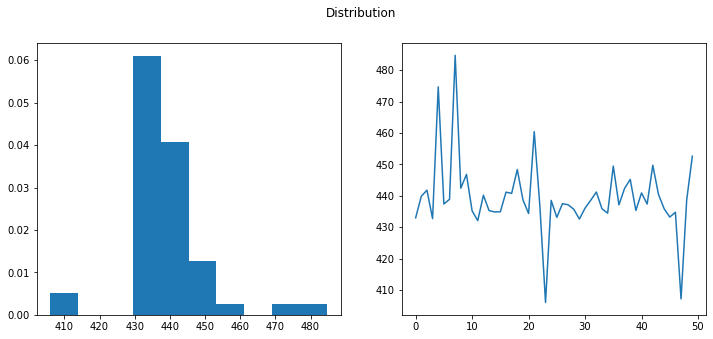

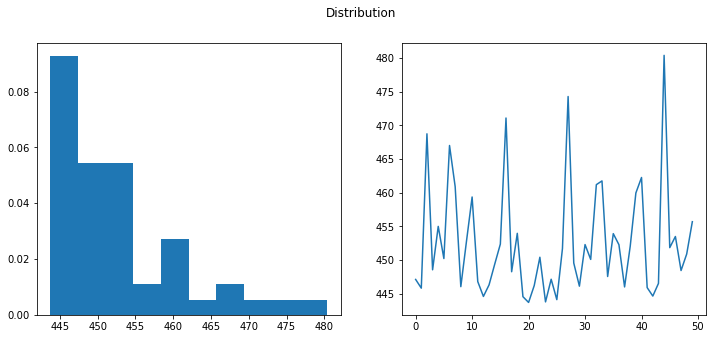

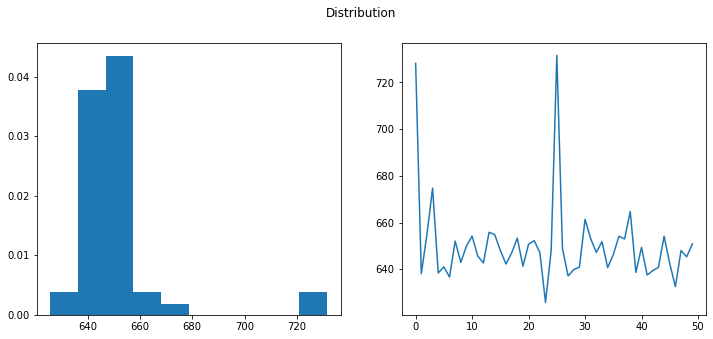

In [53]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform, algo)
    plot_runtimes(df,std,mean)

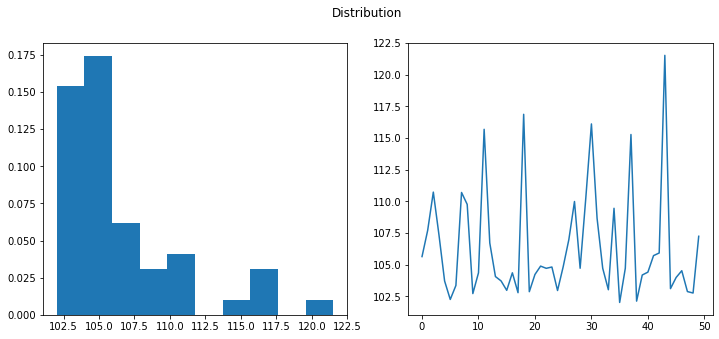

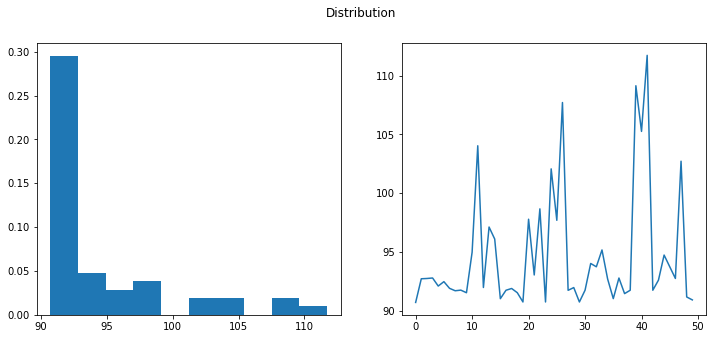

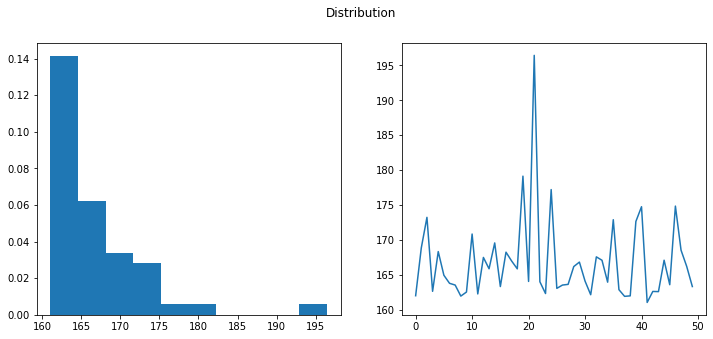

In [54]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_sorted, algo)
    plot_runtimes(df,std,mean)

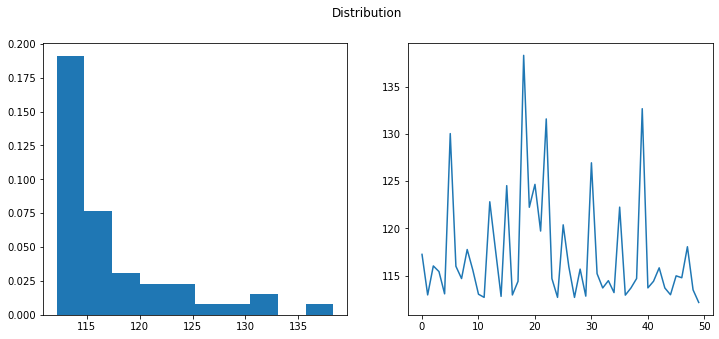

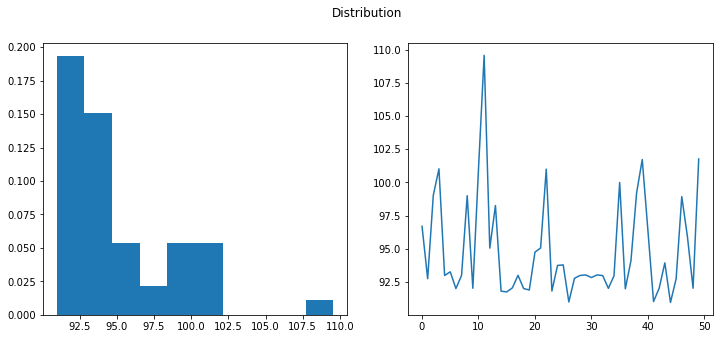

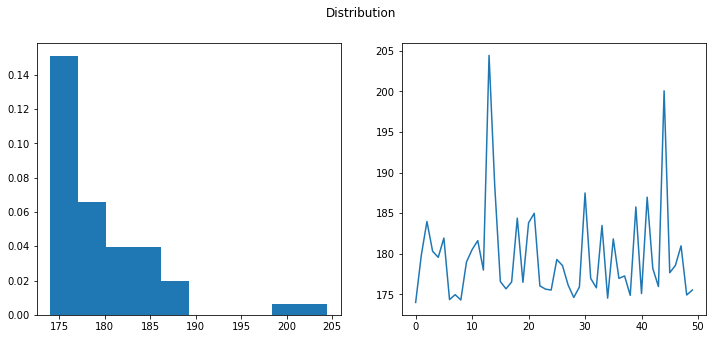

In [55]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_reverse_sorted, algo)
    plot_runtimes(df,std,mean)

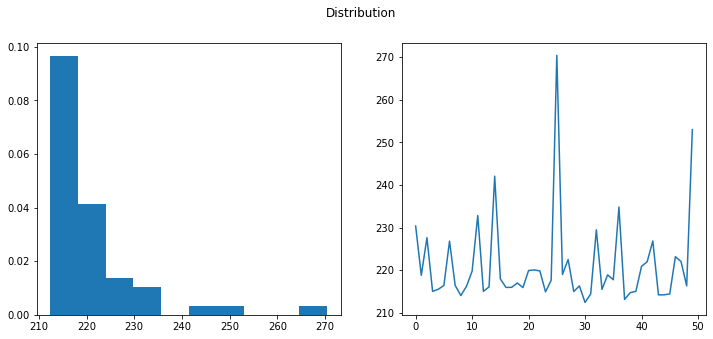

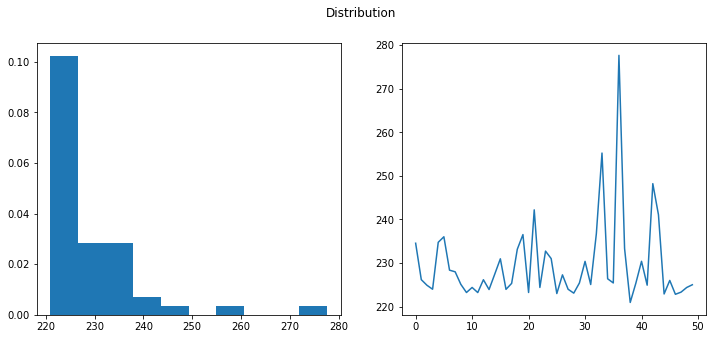

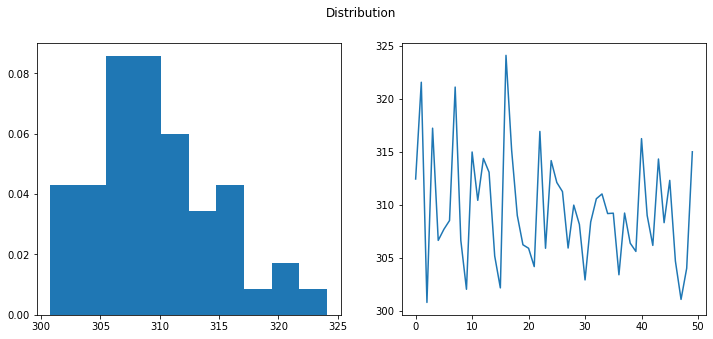

In [56]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_nearly_sorted, algo)
    plot_runtimes(df,std,mean)

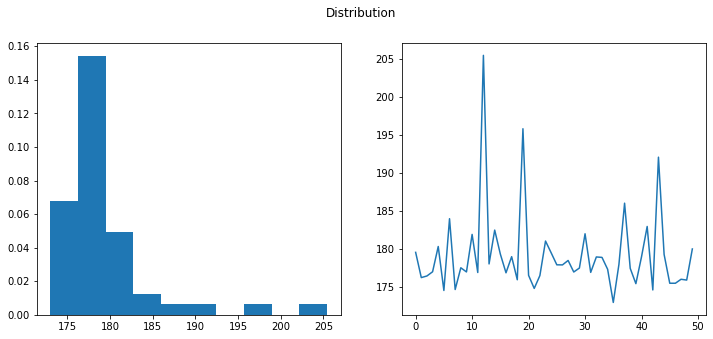

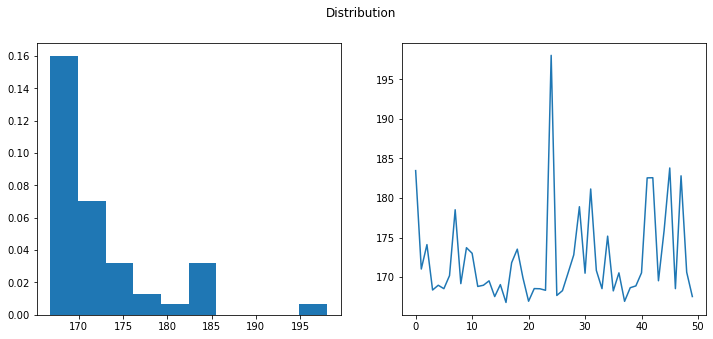

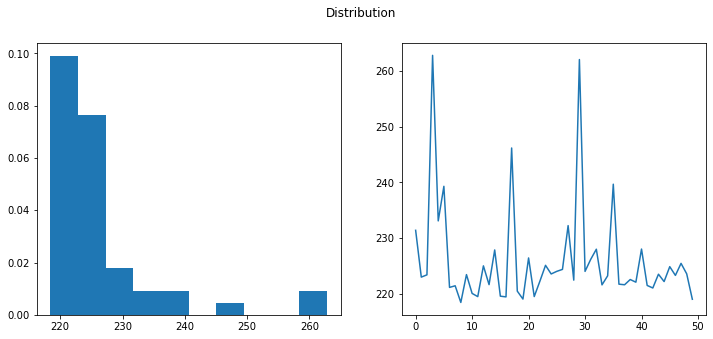

In [57]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_zipf, algo)
    plot_runtimes(df,std,mean)